## 지그재그



<img src ="https://i.imgur.com/9zb1Cdh.jpg" width=700>


---

## *set options

In [1]:
import pandas as pd

In [2]:
# 화면에 출력하는 데이터 프레임의 최대 row 수를 500으로 설정합니다.
pd.set_option('display.max_rows', 500)

# 화면에 출력하는 데이터 프레임의 최대 column 수를 500으로 설정합니다.
pd.set_option('display.max_columns', 500)

**1. data 폴더의 zigzag_DB.db에 연결한 뒤 데이터베이스 스키마를 출력하겠습니다. 그 다음,  order 테이블을 불러옵니다.**

zigzag 데이터 테이블들을 모두 zigzag_DB.db 파일에 저장해두었습니다. 저번 주 수업자료를 참고해 database를 조회하고 그 중, order 테이블을 불러와주세요.

In [3]:
# python에서 DB를 다루는 library인 sqlite3와 데이터를 다루는 library인 padas를 import합니다.
import pandas as pd
import sqlite3

In [4]:
connect = sqlite3.connect("/Users/caiyin/Downloads/Data_Dsschool/zigzag_DB.db")
connect

In [5]:
query = "SELECT * FROM 'order'"

order = pd.read_sql(query, connect)

print(order.shape)
order.head()

(867, 5)


,timestamp,user_id,goods_id,shop_id,price
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000
1,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500
2,2018-06-11 00:04:06.364,EyGjKYtSqZgqJ1ddKCtH5XwGirTyOH2P,646,14,22000
3,2018-06-11 00:04:17.258,KQBGi33Zxh5Dgu0WEkOkjN0YqTT_wxC3,5901,46,29800
4,2018-06-11 00:05:26.010,lq1Je3voA3a0MouSFba3629lKCvweI24,5572,89,29000


order 테이블의 각 행은 주문이 일어난 로그를 나타내며, 2018년 6월 11일 하루치 데이터가 주어졌습니다.

timestamp는 주문시각, user_id는 주문을 한 유저의 고유 아이디, goods_id는 상품의 id, shop_id는 쇼핑몰의 id, price는 상품의 가격을 나타냅니다.

**2. order 테이블을 이용해 지그재그의 당일 매출 상위 10개 쇼핑몰을 구합니다.**

In [6]:
#당일 매출 상위 10개 쇼핑몰을 피벗 테이블로 산출합니다.
table = pd.pivot_table(order, index = "shop_id", values = "price", aggfunc = 'sum')

# 조회
table.sort_values(('price'), ascending = False ).head(10)

,price
shop_id,
22,1365200
14,872000
63,710700
32,707900
126,669400
6,655900
11,653000
60,558300
19,518400


**3. 판매 건수를 포함하여 피벗테이블을 만듭니다. 또한, 상위 10개 쇼핑몰의 매출을 막대그래프로 보여줍니다.**

같은 횟수의 거래라도 제품의 가격이 비싸면 매출이 크게 나오게 되어있습니다. 상대적으로 저렴한 물품을 파는 쇼핑몰들은 결제 건수에 비해 매출이 적을 수 있습니다.

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 

In [8]:

table = pd.pivot_table(order, 
                       index = "shop_id", 
                       values = "price", 
                       aggfunc = ['sum', 'count'])

table.columns = ['sum', 'count']

table = table.sort_values( by = 'sum', ascending = False)

#상위 10개 
table_top10 = table.head(10)
table_top10

,sum,count
shop_id,,
22,1365200,99
14,872000,30
63,710700,27
32,707900,37
126,669400,39
6,655900,24
11,653000,19
60,558300,23
19,518400,19


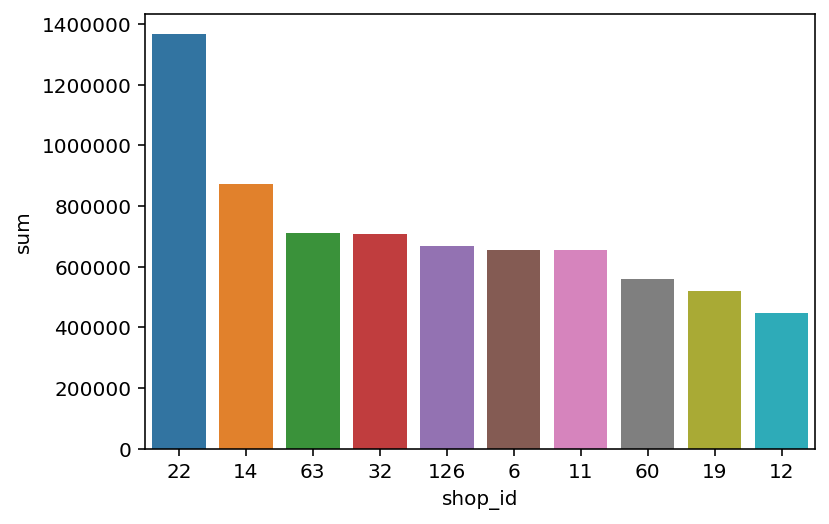

In [9]:
sns.barplot(data=table_top10, x=table_top10.index, y='sum', order=table_top10.index)

In [10]:
top10_index = table_top10.index

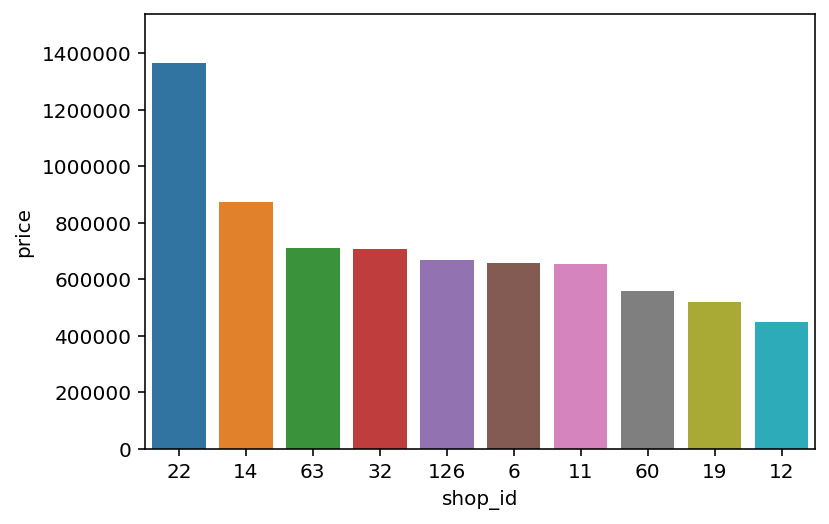

In [11]:
sns.barplot(data=order, x='shop_id', y='price',estimator=sum, order=table_top10.index, errwidth=0)

**4. 시간대별 지그재그 매출을 구하려고 합니다. lineplot을 이용하여 6월 11일의 시간대별 매출을 시각화 하겠습니다.**

지그재그 이용자들의 구매 패턴을 알아보려고 합니다. timestamp를 to_datetime을 이용하여 datetime 자료형으로 만든 뒤, 이를 이용하여 시간대별 총 매출량을 구하겠습니다.

In [12]:
import matplotlib as mpl

sns.set_style('whitegrid')

mpl.rc('font', family='AppleGothic')  
mpl.rc('axes', unicode_minus=False)

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

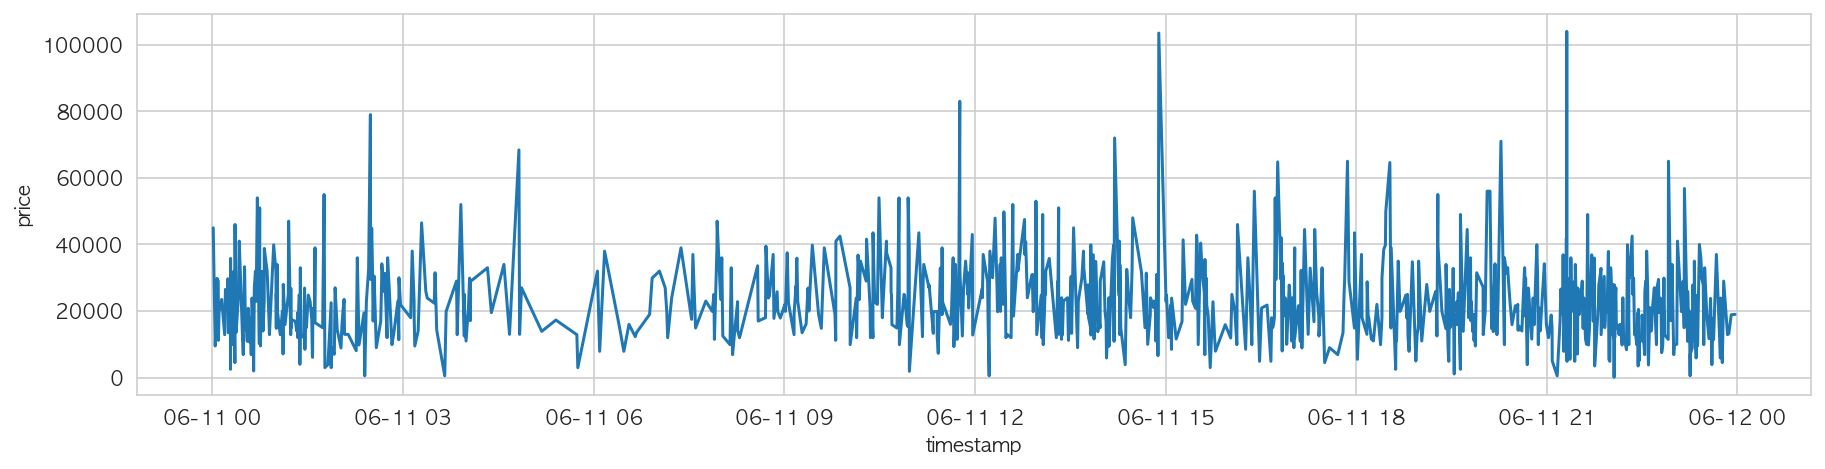

In [13]:
# timestamp를 datetime으로 타입을 변경시킵니다.
order['timestamp'] = pd.to_datetime(order['timestamp'])

# x를 timestamp, y를 price로 놓는 경우
plt.figure(figsize = (15,3.5))

# 시각화
sns.lineplot(data = order, x = 'timestamp', y = 'price')

**5. 위의 시각화를 구간화(binning) 작업을 거쳐 보기 좋은 형태로 만듭니다.**

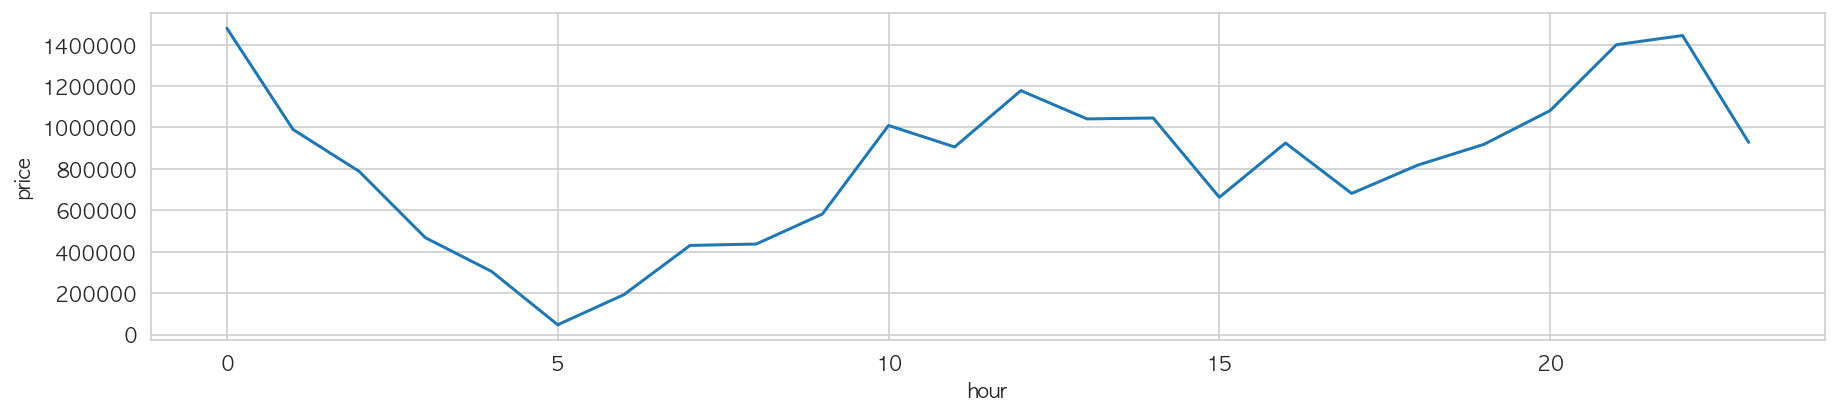

In [14]:
# order 테이블에 로그의 발생 시간을 나타내는 hour 칼럼을 추가한 뒤, 

order["hour"] = order['timestamp'].dt.hour

# pivot_table을 이용하여 시간대별 매출을 구해주세요. 

table = pd.pivot_table(order, index = 'hour', values = 'price', aggfunc = 'sum')

# 그리고, 이를 이용해 아래와 같은 그래프를 만들어 주세요.
plt.figure(figsize = (15,3))

sns.lineplot(data = table, x = table.index, y = 'price')
plt.savefig('image3.png')

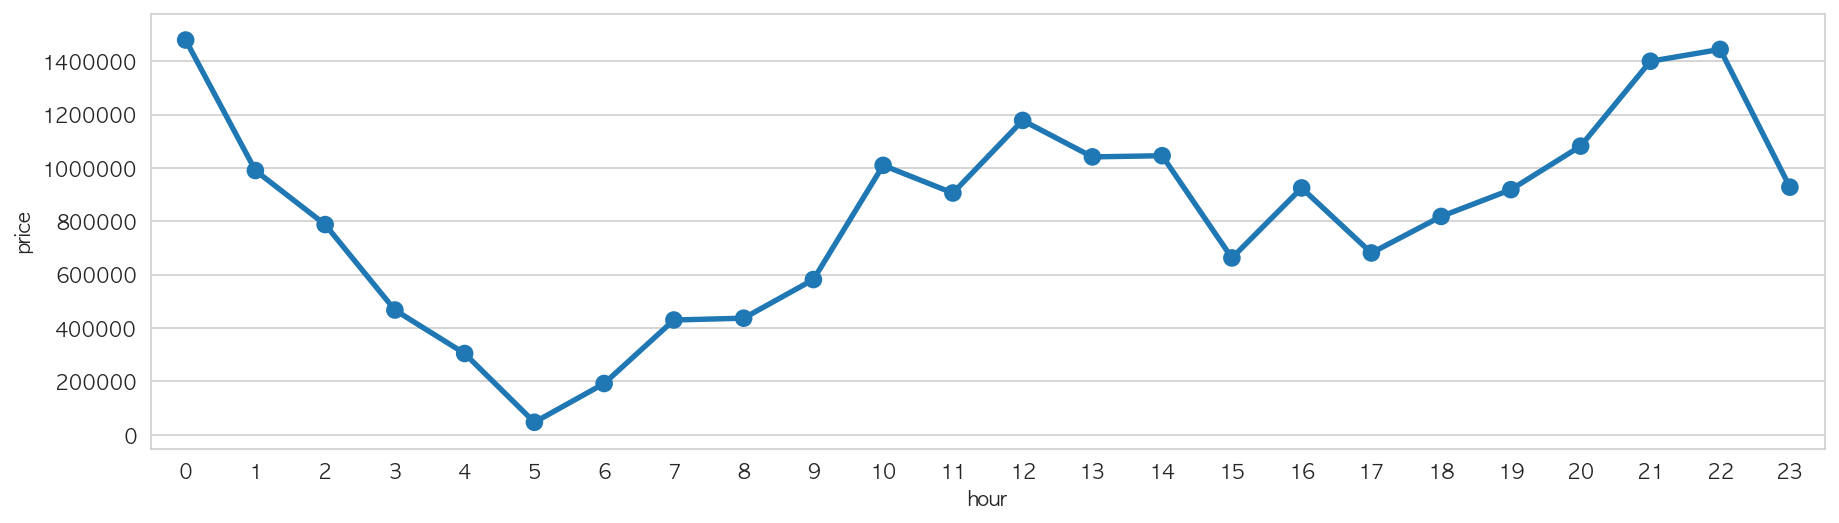

In [15]:
plt.figure(figsize=[15,4])
sns.pointplot(data=table, x=table.index, y='price')
plt.savefig('image4.png')

**6 . user 테이블을 불러와 order 테이블과 병합하겠습니다.**

user 테이블에는 고객의 고유 아이디를 나타내는 user_id, 그리고 접속 기기정보를 나타내는 os, 그리고 나이정보 age가 있습니다. 이를 이용해 top 10 쇼핑몰 매출이 어떤 연령층에서 발생했는지 분석하고자 합니다. 

In [16]:
query = "SELECT * FROM 'user'"

user = pd.read_sql(query, connect)

merged = pd.merge(order, user, on = "user_id", how = "inner")
merged.head()

,timestamp,user_id,goods_id,shop_id,price,hour,os,age
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000,0,iOS,39
1,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500,0,And,17
2,2018-06-11 00:04:06.364,EyGjKYtSqZgqJ1ddKCtH5XwGirTyOH2P,646,14,22000,0,And,-1
3,2018-06-11 00:04:17.258,KQBGi33Zxh5Dgu0WEkOkjN0YqTT_wxC3,5901,46,29800,0,And,34
4,2018-06-11 00:05:26.010,lq1Je3voA3a0MouSFba3629lKCvweI24,5572,89,29000,0,And,17


**7. 매출 Top 10 쇼핑몰 구매자들의 연령대를 쇼핑몰별로 시각화하여 보여줍니다.**

위의 병합된 테이블을 이용하여, 당일 매출 Top 10 쇼핑몰에서 구매를 한 고객들의 연령대 분포를 시각화로 표현하고자 합니다. 이를 이용해 쇼핑몰이 설정한 타겟 연령대와 실제 구매층이 일치하는지를 비교해보고자 합니다.

나이 정보가 없는 경우는 -1이 입력되어 있기 때문에 이를 처리한 다음 시각화 하겠습니다.

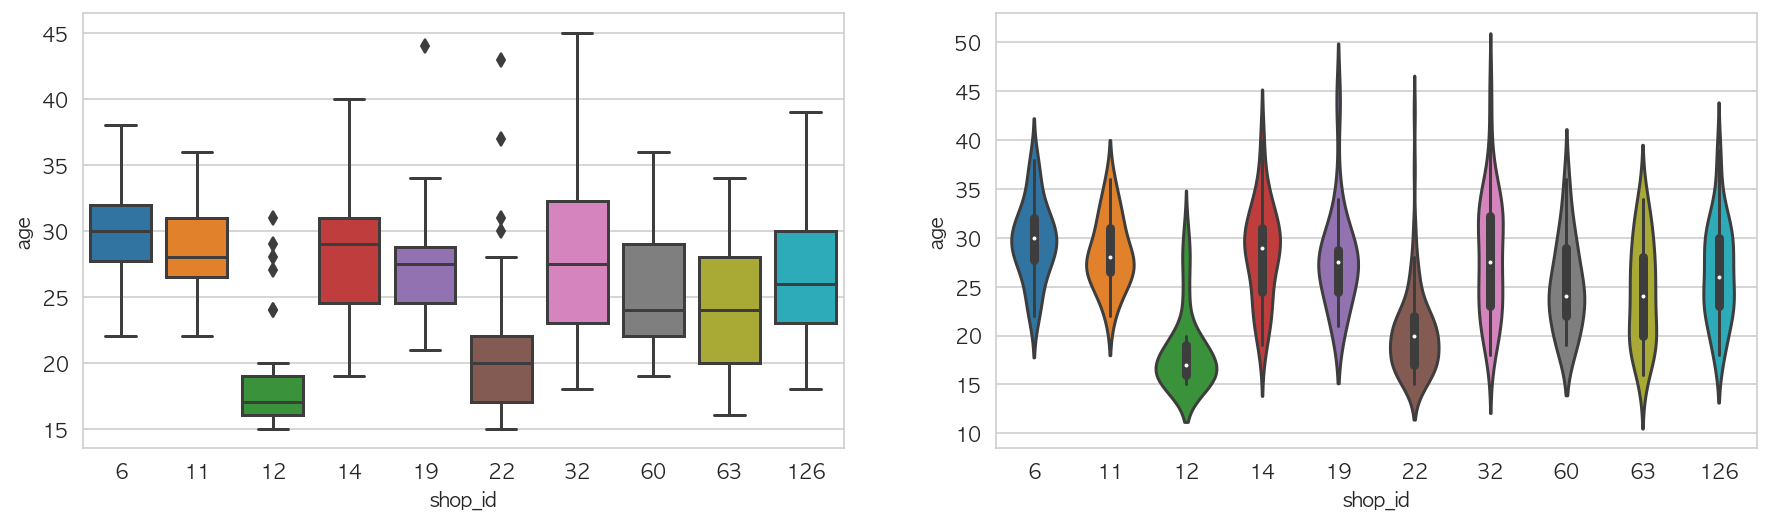

In [17]:
#상위10개 & 'age' 가 음수인 경우를 선택합니다.
merged_top10 = merged[(merged['shop_id'].isin(top10_index)) & (merged['age'] != -1)]

# 시각화 뼈대 만들기
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1)
fig.set_size_inches([15,4])

# 시각화 
sns.boxplot(data = merged_top10, x='shop_id', y='age', ax=ax1)
sns.violinplot(data = merged_top10, x='shop_id', y='age', ax=ax2)

# 시각화 저장 
fig.savefig('figure.png', dpi=400)

**8. user 테이블에 연령대를 나타내는 칼럼을 만듭니다. 그리고 쇼핑몰이 설정한 타겟 연령대와 실제로 구매를 한 고객의 연령과 일치하는지를 검증하겠습니다.**

지그재그의 쇼핑몰들은 아래의 필터에서 보여지는 것과 같이 타겟 연령대를 가지고 있습니다. 하지만, 실제 구매가 설정되어 있는 타겟 연령대에 맞게 이루어지는지 꾸준히 검증이 이루어져야 합니다. 유저에게 더 적합한 제품이나 쇼핑몰을 추천해주어 유저 경험 (UX)를 증진시키는 것은 추천 플랫폼에게 매우 중요한 요소이기 때문입니다.

<img src="https://i.imgur.com/HMd9xC2.jpg" width=300>

수행해야 할 작업은 총 3단계입니다.

    1. 실제 나이를 바탕으로 user 테이블에 연령대 칼럼을 만들기
    2. shop 테이블을 불러와 user, order 테이블과 병합하기
    3. 쇼핑몰의 타겟 연령대와 해당 쇼핑몰에서의 결제를 한 고객의 연령대를 비교하기

In [18]:
def make_generation(age):
    if age == -1:
        return '미입력'
    elif age // 10 >= 4:
        return "30대 후반"
    elif age // 10 == 1:
        return "10대"
    elif age % 10 < 3:
        return str(age // 10 * 10) + f"대 초반"
    elif age % 10 <= 6:
        return str(age // 10 * 10) + f"대 중반"
    else:
        return str(age // 10 * 10) + f"대 후반"
    
print(make_generation(10))
print(make_generation(23))
print(make_generation(29))
print(make_generation(32))
print(make_generation(35))
print(make_generation(40))

10대
20대 중반
20대 후반
30대 초반
30대 중반
30대 후반


In [19]:
# 1. 실제 나이를 바탕으로 user 테이블에 연령대 칼럼을 만들기
user["연령대"] = user["age"].apply(make_generation)
user.head()

,user_id,os,age,연령대
0,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,And,41,30대 후반
1,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,iOS,31,30대 초반
2,-1de9sT-MLwVVvnC0ncCLnqEqpSi3XSN,iOS,16,10대
3,-3A3L2jnM55B_Q1bRXMjZ6sPnINIj-Y1,And,41,30대 후반
4,-3bhcSgPOIdQAPkPNcchxvECGqGQQ78k,And,42,30대 후반


shop 테이블을 DB에서 불러옵니다. 그 다음, user, order 테이블과 병합합니다.

In [20]:
# shop 테이블을 불러와 user, order 테이블과 병합합니다.

query = " SELECT * FROM 'shop'"

shop = pd.read_sql(query, connect)

print(shop.columns) #shop_id
print(user.columns) #user_id
print(order.columns) #user_id shop_id

merged_table = (
order.merge(user, on = 'user_id')
    .merge(shop, on = 'shop_id')
)

merged_table.head()

Index(['shop_id', 'name', 'category', 'age', 'style'], dtype='object')
Index(['user_id', 'os', 'age', '연령대'], dtype='object')
Index(['timestamp', 'user_id', 'goods_id', 'shop_id', 'price', 'hour'], dtype='object')


,timestamp,user_id,goods_id,shop_id,price,hour,os,age_x,연령대,name,category,age_y,style
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000,0,iOS,39,30대 후반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌
1,2018-06-11 07:33:39.823,ni3NQK35j-YaSxli-C_Sz7ZmQqOwMljL,2278,38,37000,7,And,32,30대 초반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌
2,2018-06-11 12:56:27.867,MnvhmV0tA89bN9TLXgRTbLza689bTkT9,5513,38,31000,12,And,37,30대 후반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌
3,2018-06-11 22:57:11.582,3Vo9NP0qU_176pgbqk6Cu-CY7kpJ2-WB,7026,38,17100,22,iOS,34,30대 중반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌
4,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500,0,And,17,10대,Rachel,의류,10대/20대 초반,러블리/심플베이직


병합한 테이블을 이용하여 '거래연령 일치여부' 칼럼을 아래의 칼럼을 이용하여 만듭니다.

In [21]:
def check_generation(row):
    if row['category'] == '의류' and row['연령대'] == '미입력':
        return True
    else:
        return row['연령대'] in str(row['age_y'])

In [22]:
merged_table['거래연령 일치여부'] = merged_table.apply(check_generation, axis=1)
merged_table.head()

,timestamp,user_id,goods_id,shop_id,price,hour,os,age_x,연령대,name,category,age_y,style,거래연령 일치여부
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000,0,iOS,39,30대 후반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,False
1,2018-06-11 07:33:39.823,ni3NQK35j-YaSxli-C_Sz7ZmQqOwMljL,2278,38,37000,7,And,32,30대 초반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,True
2,2018-06-11 12:56:27.867,MnvhmV0tA89bN9TLXgRTbLza689bTkT9,5513,38,31000,12,And,37,30대 후반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,False
3,2018-06-11 22:57:11.582,3Vo9NP0qU_176pgbqk6Cu-CY7kpJ2-WB,7026,38,17100,22,iOS,34,30대 중반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,True
4,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500,0,And,17,10대,Rachel,의류,10대/20대 초반,러블리/심플베이직,True


In [23]:
table = merged_table.pivot_table(values='거래연령 일치여부',
                                                    index='shop_id',
                                                    aggfunc=['mean', 'count'])

table.head()

,mean,count
,거래연령 일치여부,거래연령 일치여부
shop_id,,
1,0.666667,3
2,0.937500,16
3,0.400000,5
4,1.000000,1
5,0.000000,1


위의 정보를 Top 10 쇼핑몰에 대해 뽑아보면 다음과 같은 결과가 나옵니다. 

의류이외의 제품을 파는 쇼핑몰은 타겟 연령층이 없기 떄문에 일치여부가 0이 나옵니다. 일치여부가 낮은 쇼핑몰의 경우는 더 긴 기간의 로그를 모니터링 한 다음, 태그 수정을 제안하여 타겟 적합도를 높일 수 있습니다.

**9. 쇼핑몰의 스타일 태그를 정리합니다.**

쇼핑몰별로 제품군의 스타일을 나타낼 수 있는 태그를 가지고 있습니다. 이 태그는 다음의 리스트에 정리되어 있습니다.

In [24]:
style_list = ['페미닌', '모던시크', '심플베이직', '러블리', '유니크', '미시스타일', '캠퍼스룩', '빈티지', '섹시글램', '스쿨룩', '로맨틱', '오피스룩',
              '럭셔리', '헐리웃스타일', '심플시크', '키치', '펑키', '큐티', '볼드&에스닉' ]

위의 스타일을 정리하여 shop 테이블을 전처리해 아래와 같은 테이블을 만들어줍니다.

예를 들어 shop_id가 1인 쇼핑몰의 스타일이 `모던시크/러블리`인 경우 모던시크 칼럼과 러블리 칼럼은 True 값을 가지고 나머지 칼럼은 False의 값을 가집니다.

In [25]:
for style in style_list:
    shop[f"{style}"] = shop["style"].str.contains(style)

**10. 스타일별 실제 구매 기록을 바탕으로 가장 구매가 많이 일어난 스타일 키워드를 찾아줍니다. 또한, 매출이 가장 많은 3가지 스타일의 구매 연령대 분포를 그려줍니다.**


위에서 전처리한 스타일을 이용하기 위해 order, shop, user 테이블을 다시 테이블을 병합하도록 하겠습니다.

In [26]:
merged = (
    order.merge(shop, on='shop_id')
             .merge(user, on='user_id')
)

print(merged.shape)
merged.head(3)

(867, 32)


,timestamp,user_id,goods_id,shop_id,price,hour,name,category,age_x,style,페미닌,모던시크,심플베이직,러블리,유니크,미시스타일,캠퍼스룩,빈티지,섹시글램,스쿨룩,로맨틱,오피스룩,럭셔리,헐리웃스타일,심플시크,키치,펑키,큐티,볼드&에스닉,os,age_y,연령대
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000,0,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,iOS,39,30대 후반
1,2018-06-11 07:33:39.823,ni3NQK35j-YaSxli-C_Sz7ZmQqOwMljL,2278,38,37000,7,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,And,32,30대 초반
2,2018-06-11 12:56:27.867,MnvhmV0tA89bN9TLXgRTbLza689bTkT9,5513,38,31000,12,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,And,37,30대 후반


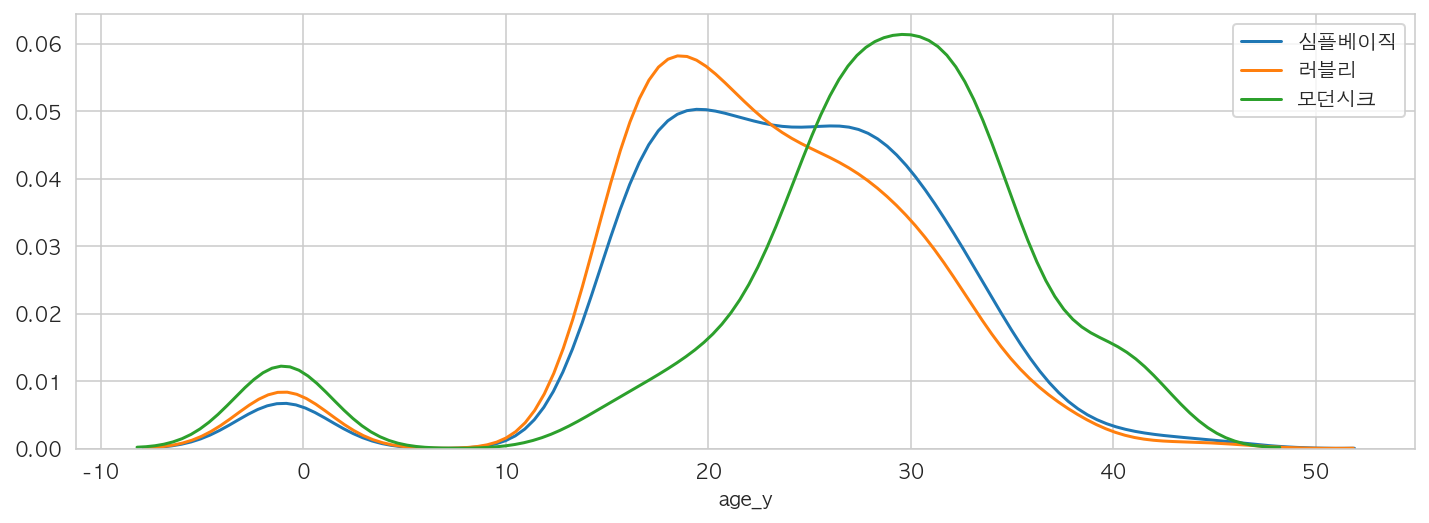

In [27]:
# 각 스타일 별로 변수에 기입합니다.
simplebasic = merged[merged["심플베이직"] == True]
lovely =  merged[merged["러블리"] == True]
modernchic =  merged[merged["모던시크"] == True]

# 사이즈
plt.figure(figsize = (12,4))

# 히스토그램 
sns.distplot( simplebasic["age_y"], hist = False, label = "심플베이직")
sns.distplot(lovely["age_y"], hist = False, label = "러블리")
sns.distplot(modernchic["age_y"], hist = False, label = "모던시크")

plt.savefig('dist.png', dpi = 400)


**10. DB에서 로그 데이터를 불러온 다음 timestamp 컬럼을 datetime 형식으로 바꿔줍니다. 그리고 user id를 보기 쉽게 간단한 자연수 형태로 변환합니다.**

In [28]:
# data_logs 데이터 불러옵니다.
query = "SELECT * FROM log"

data_logs = pd.read_sql(query, connect)

#timestamp를 datetime로 변환합니다.
data_logs["timestamp"] = pd.to_datetime(data_logs["timestamp"])

print(data_logs.dtypes)
data_logs.head()

timestamp         datetime64[ns]
user_id                   object
event_origin              object
event_name                object
event_goods_id           float64
event_shop_id            float64
dtype: object


,timestamp,user_id,event_origin,event_name,event_goods_id,event_shop_id
0,2018-06-11 00:00:00.213,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,shops_ranking,app_page_view,NaN,NaN
1,2018-06-11 00:00:00.810,lwFZ77v_ygk0uU40t1ud3l30EZ6sE2R3,shops_bookmark,app_page_view,NaN,NaN
2,2018-06-11 00:00:00.956,mR-bO6hC9g-m8ERXMRQZaRwJFvzNNdd8,goods_search_result/로브,app_page_view,NaN,NaN
3,2018-06-11 00:00:01.084,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,shops_bookmark,app_page_view,NaN,NaN
4,2018-06-11 00:00:01.561,Yjny5AchUWLiuv4kdeq50COF-S8OFXPd,shops_bookmark,app_page_view,NaN,NaN


지그재그 로그 데이터의 명세는 다음과 같습니다.


    - 컬럼 별 명세
        1. timestamp : 이벤트 발생 시간 (한국 시간 기준)
        2. user_id : 이용자 고유 식별자
        3. event_origin : 이벤트가 발생한 앱 위치
            - event_origin 값 별 의미
                a. goods_search_result : 특정 검색어의 상품 검색 결과
                    (Ex: goods_search_result/반팔티)
                b. shops_ranking : '쇼핑몰 랭킹' 영역
                c. shops_bookmark : '즐겨찾기' 영역
                d. category_search_result : 카테고리 검색 결과 
                    (Ex:category_search_result/상의)
                e. my_goods : '내 상품' 영역
                
        4. event_name : 발생한 이벤트 명
            - event_name 값 별 의미
                a. app_page_view : 앱 내 화면 이동
                b. enter_browser : 앱 내 클릭을 통해, 특정 웹페이지로 진입
                c. add_bookmark : 특정 쇼핑몰을 즐겨찾기 추가
                d. remove_bookmark : 특정 쇼핑몰을 즐겨찾기 제거
                e. add_my_goods : 특정 상품을 내 상품 추가
                f. remove_my_goods : 특정 상품을 내 상품 제거
                
        5. event_goods_id : 이벤트가 발생한 상품 고유 식별자
             - 상품 관련 이벤트가 아닌 경우, 공백
             
        6. event_shop_id : 이벤트가 발생한 쇼핑몰 고유 식별자
             - 쇼핑몰 관련 이벤트가 아닌 경우, 공백



In [29]:
# 판다스의 unique() 기능을 이용하여 유저 아이디를 user_id라는 변수에 저장합니다.
user_id = pd.unique(data_logs['user_id'])

user_id

array(['K1d8_t3-QIskaSkrx32oAFu856D8JmLo',
       'lwFZ77v_ygk0uU40t1ud3l30EZ6sE2R3',
       'mR-bO6hC9g-m8ERXMRQZaRwJFvzNNdd8', ...,
       'Biv6EU_P8ZydD40qCYuXkKaLp8LdHvh0',
       'tR2dBDR1GbWKfenC6aeIypAXWrhr9R9Q',
       'RJeFFB2G8EB83IJMWALnjju3r5BhJFj8'], dtype=object)

In [30]:
#새로운 user_id는 연속된 자연수들로 지정합니다. range()와 len()을 사용하여 user_id의 개수만큼의 연속된 정수를 만듭니다.

n_user_id = range(user['user_id'].size)

n_user_id

range(0, 10000)

In [31]:
#python 내장 함수인 zip()을 이용하여 기존의 id와 새로운 id를 묶습니다.
id_zip = zip(user_id, n_user_id)

#id_zip을 출력하면 아래 결과와 같이 zip object이 출력됩니다.
print(id_zip)

In [32]:
#zip()의 결과를 구체적으로 보기 위하여 list로 변환하여 print하겠습니다. 상위 5개만 출력합니다.
list(zip(user_id, n_user_id))[:5]


[('K1d8_t3-QIskaSkrx32oAFu856D8JmLo', 0),
 ('lwFZ77v_ygk0uU40t1ud3l30EZ6sE2R3', 1),
 ('mR-bO6hC9g-m8ERXMRQZaRwJFvzNNdd8', 2),
 ('Yjny5AchUWLiuv4kdeq50COF-S8OFXPd', 3),
 ('LZZ0ktGq6hW685TFAQfcGNhsKVUEceHl', 4)]

In [33]:
#새로운 id와 기존의 id가 대응된 딕셔너리 타입 변수를 생성합니다.
id_dict = dict(id_zip)

id_dict

{'K1d8_t3-QIskaSkrx32oAFu856D8JmLo': 0,
 'lwFZ77v_ygk0uU40t1ud3l30EZ6sE2R3': 1,
 'mR-bO6hC9g-m8ERXMRQZaRwJFvzNNdd8': 2,
 'Yjny5AchUWLiuv4kdeq50COF-S8OFXPd': 3,
 'LZZ0ktGq6hW685TFAQfcGNhsKVUEceHl': 4,
 'TUoAGIbbNds5cYLZLnz-R5VlkG5L8RuZ': 5,
 'B9F_BHH9F3b6MW329go9jDr71Uunx629': 6,
 'e_xrTZ9fHVodxxadLx688qUKMWCdL8bW': 7,
 'aA9S7LxnFm6ym6IUEa-4SSxJa-iL5m2J': 8,
 '1V2qyn-5WTsZm47-jPLkIR3bNPZ6IudQ': 9,
 'gAZcQyqsBDzE0GTujwQplu5LaiglC0mQ': 10,
 'hkm8GKNURA-0WHrYtto_O0ujXgPSEsW3': 11,
 'Y3X7Crifq4x6Py7OF4SRdHsRNXaxpARl': 12,
 'CFGbbyBJ2QvhxkZaFBD-qYTtKPdWbCxq': 13,
 'kAfEgmGLiFqtkx9xvW8jsP-g-qZlcZoO': 14,
 'jSKnyXhWkneewc11kGtVAziiBBcyU_rO': 15,
 'T6me3B7p0mQxU2jQSRCs_QoV6Udpleh2': 16,
 'b0YlbPxL2NMvaZMmm2mZ8OLnx7Co0sZH': 17,
 'M07jHl0eoRUs4oZgsxgVuU2D_oH7JEIO': 18,
 'htvUPLK8Qw_81Cmth31U_aEhfuedE87S': 19,
 'JHBkpkRYDODJDtlVcYVJ_JcRmj9BR_n3': 20,
 'RbNNhMsl38Cbfxl1dC4je4TWwyulhl_Q': 21,
 'FdvjFZtiumkMqEYywtsT3L7YAcFaKl_f': 22,
 'PdhsCcanvDszfAysiJzalzQRQbasWL7d': 23,
 'Qgxse0nmmfJ44SBziJr5Nx8-

In [34]:
# data_logs, order, user에 id_dict를 mapping하여 각 데이터 프레임에 새로운 고객 id컬럼인 n_user_id를 만듭니다.

data_logs["n_user_id"] = data_logs['user_id'].map(id_dict)
order["n_user_id"] = order['user_id'].map(id_dict)
user["n_user_id"] = user['user_id'].map(id_dict)

# 결과 확인을 위해 data_logs에서 user_id, n_user_id 컬럼의 상위 5 rows만 출력해주세요.

data_logs[['user_id', 'n_user_id']].head()

,user_id,n_user_id
0,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,0
1,lwFZ77v_ygk0uU40t1ud3l30EZ6sE2R3,1
2,mR-bO6hC9g-m8ERXMRQZaRwJFvzNNdd8,2
3,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,0
4,Yjny5AchUWLiuv4kdeq50COF-S8OFXPd,3


 **12. 주문 데이터, 로그 데이터를 concat 하겠습니다.**

In [35]:
#주문 데이터의 첫번째 row를 출력합니다.
order.iloc[0]

timestamp          2018-06-11 00:00:43.032000
user_id      bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx
goods_id                                 1414
shop_id                                    38
price                                   45000
hour                                        0
n_user_id                                 277
Name: 0, dtype: object

In [36]:
#위의 user_id에 해당하는 고객의 log기록을 가져옵니다
data_logs[data_logs['user_id'] == 'bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx']

,timestamp,user_id,event_origin,event_name,event_goods_id,event_shop_id,n_user_id
878,2018-06-11 00:06:45.357,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨,app_page_view,NaN,NaN,277
901,2018-06-11 00:06:54.034,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨바지,app_page_view,NaN,NaN,277
1062,2018-06-11 00:08:00.579,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨바지,enter_browser,2048.0,46.0,277
1259,2018-06-11 00:09:38.881,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨바지,app_page_view,NaN,NaN,277
1439,2018-06-11 00:11:04.446,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨바지,enter_browser,3486.0,38.0,277
1473,2018-06-11 00:11:20.354,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨바지,app_page_view,NaN,NaN,277
1526,2018-06-11 00:11:48.284,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨바지,enter_browser,4006.0,24.0,277
2423,2018-06-11 00:18:21.906,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨바지,app_page_view,NaN,NaN,277
2529,2018-06-11 00:19:01.928,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨,app_page_view,NaN,NaN,277
2758,2018-06-11 00:20:30.432,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,shops_bookmark,app_page_view,NaN,NaN,277


00시 37분에 마지막 log가 기록되어 있습니다. 이 기록을 바탕으로 해당 고객은 쇼핑몰 즐겨찾기 목록에서 특정 쇼핑몰을 클릭하여 들어간다음 43분에 린넨바지를 구매한 것을 유추할 수 있습니다. 

logs 테이블에 존재하는 기록들은 위와 같이 기록이 되어 있습니다. 사람들이 구매를 하도록 유도하는 것이 최종 목표이기 때문에, 로그기록과 구매기록을 연결하는 것은 매우 중요합니다. 하지만, 로그 테이블에는 이 사람이 구매를 했는지에 대한 정보가 전혀 없기 때문에 order 테이블과 log 테이블을 병합해야할 필요가 있습니다. 이를 `pd.concat()` 을 이용하여 병합하도록 하겠습니다.

기록 중에, 주문을 했지만 그 전의 로그 정보가 전혀 없는 고객들이 있습니다. 시간 대를 살펴봤을 때, 이들은 전날에 로그 기록이 존재하고 6월 11일 자정 이후 결제를 한 것으로 추론됩니다. 이들은 잔존 시간을 계산하는데 오류를 일으키므로 이들을 제외하고 concat 하도록 하겠습니다.

로그 데이터와 주문 데이터에 동시에 기록된 고객을 구하겠습니다.

데이터를 집합(set)으로 변환하면 중복된 원소들은 1개만 남고 제거됩니다. unique() 메서드의 결과와 같다고 생각하시면 됩니다. 이를 이용하겠습니다.
 
코드예시는 아래와 같습니다. 아래의 예시를 활용해 주세요.

```
#집합 타입으로 변환하는 코드입니다.
set(data['column'])

#집합의 원소의 개수를 반환하는 코드입니다.
len(set(data['column']))

#두 집합의 공통된 원소들의 집합을 반환하는 코드입니다.
set(data1['column']) & set(data2['column'])
```


In [37]:
# 주문한 고객의 수를 user_number_order란 변수에 저장해주세요.
user_set = set(order['user_id'])
user_number_order = len(user_set)

# log에 기록된 고객의 수를 user_number_log란 변수에 저장해주세요.
log_set = set(data_logs['user_id'])
user_number_log = len(log_set)


# 중복된 고객의 수를 user_duplicated란 변수에 저장해주세요.
user_duplicated = user_set & log_set


# 결과를 출력합니다.
print('해당 날짜에 구매한 총 고객수 입니다 :',user_number_order, end ='명\n')
print('해당 날짜 log데이터에 기록된 총 고객수입니다 :',user_number_log,  end ='명\n')
print('중복되는 고객수입니다 :', len(user_duplicated) , end ='명\n')

해당 날짜에 구매한 총 고객수 입니다 : 832명
해당 날짜 log데이터에 기록된 총 고객수입니다 : 9909명
중복되는 고객수입니다 : 742명


중복되는 고객의 목록을 구하였으므로 이제는 두 데이터들을 concat하기 위해 column명을 동일하게 맞추겠습니다.

order, data_logs의 column을 확인합니다.

In [38]:
# 판다스의 merge를 이용할 수도 있습니다.
log_order_user = pd.merge(data_logs, order, on = 'user_id', how = 'inner')

user_duplicated = log_order_user['user_id'].unique()

print('중복되는 고객수입니다 :', len(user_duplicated) , end ='명\n')

중복되는 고객수입니다 : 742명


In [39]:
print(order.columns)
print(data_logs.columns)

Index(['timestamp', 'user_id', 'goods_id', 'shop_id', 'price', 'hour',
       'n_user_id'],
      dtype='object')
Index(['timestamp', 'user_id', 'event_origin', 'event_name', 'event_goods_id',
       'event_shop_id', 'n_user_id'],
      dtype='object')


data_logs의 columns을 기준으로 병합할 것입니다. 따라서 order의 columns을 data_logs에 맞춰 변형합니다.

In [40]:
# order 원본을 변형하지 않기 위해 order을 copy하여 사용합니다. 
order_copy = order.copy()

In [41]:
# 겹치는 유저만으로 data를 indexing합니다. user_duplicated 이용합니다. 
# isin을 이용한 indexing은 뒤의 문제에서도 많이 나오기 때문에 유심히 봐두시면 유용합니다.
order_copy = order_copy[order_copy['user_id'].isin(user_duplicated)]

#  event_origin 컬럼에는 shop_id 컬럼을 저장합니다.
order_copy['event_origin'] = order_copy['shop_id']

#  event_name 컬럼에는 'purchase'를 저장합니다.
order_copy['event_name'] = 'purchase'

# event_goods_id 컬럼에는 good_id 컬럼를 저장합니다.
order_copy['event_goods_id'] = order_copy['goods_id']

# 사용할 columns를 설정합니다.
order_copy = order_copy[['timestamp', 'n_user_id', 'user_id','event_origin',
         'event_name', 'event_goods_id', 'price']]

order_copy.head()


,timestamp,n_user_id,user_id,event_origin,event_name,event_goods_id,price
0,2018-06-11 00:00:43.032,277.0,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,38,purchase,1414,45000
1,2018-06-11 00:02:33.763,444.0,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,12,purchase,1351,9500
4,2018-06-11 00:05:26.010,167.0,lq1Je3voA3a0MouSFba3629lKCvweI24,89,purchase,5572,29000
5,2018-06-11 00:05:35.182,160.0,GM0-EsJPHjkpteIpAQIwaCdUjU81lhW1,22,purchase,55,11200
6,2018-06-11 00:06:14.314,113.0,lgvWxrv7r5RGklXSJqM2x6NUBZ5H-RQZ,22,purchase,2451,19800


In [42]:
# data_logs, order_copy를 concat 해주하여 다시 log_order에 저장해주세요.

log_order = pd.concat([data_logs, order_copy], sort = False)

log_order.shape

(106587, 8)

----

In [43]:
log_order["purchase"] = log_order["price"].notnull()

log_order.head()

,timestamp,user_id,event_origin,event_name,event_goods_id,event_shop_id,n_user_id,price,purchase
0,2018-06-11 00:00:00.213,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,shops_ranking,app_page_view,NaN,NaN,0.0,NaN,False
1,2018-06-11 00:00:00.810,lwFZ77v_ygk0uU40t1ud3l30EZ6sE2R3,shops_bookmark,app_page_view,NaN,NaN,1.0,NaN,False
2,2018-06-11 00:00:00.956,mR-bO6hC9g-m8ERXMRQZaRwJFvzNNdd8,goods_search_result/로브,app_page_view,NaN,NaN,2.0,NaN,False
3,2018-06-11 00:00:01.084,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,shops_bookmark,app_page_view,NaN,NaN,0.0,NaN,False
4,2018-06-11 00:00:01.561,Yjny5AchUWLiuv4kdeq50COF-S8OFXPd,shops_bookmark,app_page_view,NaN,NaN,3.0,NaN,False


----

In [44]:
# 데이터를 파악하기 쉽게 하기 위해 user_id, timestamp 컬럼을 기준으로 log_order를 정렬해주세요.
# sort_values()를 사용해주시고 reset_index()를 통해 index를 정리합니다.

log_order = log_order.sort_values(by = ['user_id', 'timestamp']).reset_index(drop =True)

log_order.head()

,timestamp,user_id,event_origin,event_name,event_goods_id,event_shop_id,n_user_id,price,purchase
0,2018-06-11 15:57:10.615,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,shops_bookmark,app_page_view,NaN,NaN,5899.0,NaN,False
1,2018-06-11 15:59:05.505,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,shops_bookmark,app_page_view,NaN,NaN,5899.0,NaN,False
2,2018-06-11 00:55:37.309,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,my_goods,app_page_view,NaN,NaN,1130.0,NaN,False
3,2018-06-11 00:55:44.430,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,my_goods,enter_browser,2506.0,40.0,1130.0,NaN,False
4,2018-06-11 01:00:33.295,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,my_goods,app_page_view,NaN,NaN,1130.0,NaN,False


**13. 동일한 사용자에 대한 연속한 로그들 사이의 시간 간격을 구합니다.**

고객별 연속한 log사이의 시간 간격을 log duration으로 정의합니다. 이는 고객의 잔존시간을 구하는 것으로 연결됩니다.

현재 제공된 데이터에서는 고객이 앱을 종료하는 기록이 없기 때문에 마지막 log의 log_duration은 0이라고 가정을 합니다.

In [45]:
# 우선, timestamp 컬럼를 datetime 타입으로 변환합니다.

log_order["timestamp"] = pd.to_datetime(log_order["timestamp"])

----

In [46]:
# timestamp_after 컬럼을 다음과 같이 만듭니다.
log_order['timestamp_after'] = log_order.groupby(['n_user_id'])['timestamp'].shift(-1)

print(log_order.dtypes)
log_order.head()

timestamp          datetime64[ns]
user_id                    object
event_origin               object
event_name                 object
event_goods_id            float64
event_shop_id             float64
n_user_id                 float64
price                     float64
purchase                     bool
timestamp_after    datetime64[ns]
dtype: object


,timestamp,user_id,event_origin,event_name,event_goods_id,event_shop_id,n_user_id,price,purchase,timestamp_after
0,2018-06-11 15:57:10.615,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,shops_bookmark,app_page_view,NaN,NaN,5899.0,NaN,False,2018-06-11 15:59:05.505
1,2018-06-11 15:59:05.505,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,shops_bookmark,app_page_view,NaN,NaN,5899.0,NaN,False,NaT
2,2018-06-11 00:55:37.309,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,my_goods,app_page_view,NaN,NaN,1130.0,NaN,False,2018-06-11 00:55:44.430
3,2018-06-11 00:55:44.430,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,my_goods,enter_browser,2506.0,40.0,1130.0,NaN,False,2018-06-11 01:00:33.295
4,2018-06-11 01:00:33.295,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,my_goods,app_page_view,NaN,NaN,1130.0,NaN,False,2018-06-11 01:11:03.608


----


In [47]:
# log_duration을 계산하고 nan값(마지막 로그)는 0으로 채워 log_duration 컬럼에 저장합니다.

from datetime import datetime as dt 

log_order['log_duration'] = log_order['timestamp_after'] - log_order['timestamp']

log_order[['timestamp','timestamp_after','log_duration']].head()

,timestamp,timestamp_after,log_duration
0,2018-06-11 15:57:10.615,2018-06-11 15:59:05.505,00:01:54.890000
1,2018-06-11 15:59:05.505,NaT,NaT
2,2018-06-11 00:55:37.309,2018-06-11 00:55:44.430,00:00:07.121000
3,2018-06-11 00:55:44.430,2018-06-11 01:00:33.295,00:04:48.865000
4,2018-06-11 01:00:33.295,2018-06-11 01:11:03.608,00:10:30.313000


----

In [48]:
# 분석의 편의를 위하여 map()과 total_seconds() 메서드를 이용하여 log_duration을 초로 환산해주세요.
# 마지막으로, 이 후의 계산을 위해 astype() 메서드를 이용하여 log_duration 컬럼을 float으로 변환해주세요.  

log_order['log_duration'] = log_order['log_duration'].map(lambda x: x.total_seconds()).astype('float') 
#log_order['page_duration'].dt.total_seconds()

log_order[['n_user_id','timestamp', 'timestamp_after', 'log_duration']].head()

,n_user_id,timestamp,timestamp_after,log_duration
0,5899.0,2018-06-11 15:57:10.615,2018-06-11 15:59:05.505,114.890
1,5899.0,2018-06-11 15:59:05.505,NaT,NaN
2,1130.0,2018-06-11 00:55:37.309,2018-06-11 00:55:44.430,7.121
3,1130.0,2018-06-11 00:55:44.430,2018-06-11 01:00:33.295,288.865
4,1130.0,2018-06-11 01:00:33.295,2018-06-11 01:11:03.608,630.313


**14. 고객이 한 번 앱에 들어와서 활동하는 시간인 잔존시간을 구하기 위해 cycle을 정의합니다. - session**

고객이 한번 app에 접속하여 나가기까지의 일련의 활동을 한 cycle이라 정의하겠습니다.

cycle을 구하기 위해서 고객이 cycle을 종료하고 앱을 나갔는지 여부(boolean)인 is_out이라는 컬럼을 만듭니다. is_out의 조건은 아래와 같이 2가지가 있습니다.

    조건 1) log_duration이 0이면 고객의 당일 마지막 log입니다.
    
    조건 2) log간 간격이 40분이상이면 고객이 한 cycle이 종료하고 다음 cycle로 돌아온 것이라고 하겠습니다.

    
   

따라서 위의 조건중 적어도 1개를 만족시키면 True되도록 is_out 컬럼을 생성해주세요. 





In [49]:
# 30분을 초로 환산해주셔야 합니다.

log_order["is_out"] = (log_order["log_duration"] > 2400) | (log_order["log_duration"] == 0 )

log_order[['n_user_id','timestamp', 'timestamp_after', 'log_duration', 'is_out']].head()

,n_user_id,timestamp,timestamp_after,log_duration,is_out
0,5899.0,2018-06-11 15:57:10.615,2018-06-11 15:59:05.505,114.890,False
1,5899.0,2018-06-11 15:59:05.505,NaT,NaN,False
2,1130.0,2018-06-11 00:55:37.309,2018-06-11 00:55:44.430,7.121,False
3,1130.0,2018-06-11 00:55:44.430,2018-06-11 01:00:33.295,288.865,False
4,1130.0,2018-06-11 01:00:33.295,2018-06-11 01:11:03.608,630.313,False


log_duration이 2400이상 또는 음수인 log들은 cycle의 마지막 log입니다. 예를 들어, log_duration이 36000인 log가 있으면 이는 10시간 뒤에 다시 app에 접속한다는 것을 의미하지 실제 10시간 동안 앱을 사용했다는 의미가 아닙니다. 따라서 특정 사람에 대한 해당 logs는 해당 cycle의 마지막 log가 되고 다음 log는 10시간 뒤인 다음 cycle의 첫 log가 됩니다.

즉, 위의 조건들을 만족하는 log들의 log_duration은 0이 되도록 변환해주어야 합니다.

In [50]:
log_order["log_duration"].unique()

array([114.89 ,     nan,   7.121, ..., 464.937,  65.07 ,  73.201])

In [64]:
log_order.loc[log_order['is_out'], 'log_duration'] = 0

log_order[['n_user_id','timestamp', 'timestamp_after', 'log_duration', 'is_out']].head(20)

,timestamp,user_id,event_origin,event_name,event_goods_id,event_shop_id,n_user_id,price,purchase,timestamp_after,log_duration,is_out
21,2018-06-11 02:35:58.590,-1de9sT-MLwVVvnC0ncCLnqEqpSi3XSN,my_goods,remove_my_goods,324.0,92.0,1863.0,NaN,False,2018-06-11 16:15:23.793,0.0,True
25,2018-06-11 16:16:33.411,-1de9sT-MLwVVvnC0ncCLnqEqpSi3XSN,shops_bookmark,app_page_view,NaN,NaN,1863.0,NaN,False,2018-06-11 22:27:56.017,0.0,True
57,2018-06-11 19:04:21.254,-3A3L2jnM55B_Q1bRXMjZ6sPnINIj-Y1,shops_bookmark,app_page_view,NaN,NaN,7186.0,NaN,False,2018-06-11 20:16:54.784,0.0,True
63,2018-06-11 20:17:40.695,-3A3L2jnM55B_Q1bRXMjZ6sPnINIj-Y1,my_goods,app_page_view,NaN,NaN,7186.0,NaN,False,2018-06-11 21:42:53.604,0.0,True
66,2018-06-11 21:44:18.787,-3A3L2jnM55B_Q1bRXMjZ6sPnINIj-Y1,shops_bookmark,app_page_view,NaN,NaN,7186.0,NaN,False,2018-06-11 23:08:47.625,0.0,True


In [54]:
# is_out = True 값 중에, 2400이상 또는 음수 log_duration 0으로 변동

def return_zero(log):
    
    if log > 2400 or log < 0 :
        return 0
    
    else:
        return log

log_true = log_order[log_order["is_out"] == True]
log_false = log_order[log_order["is_out"] == False]

log_true["log_duration"].apply(return_zero)

log_order = pd.concat([log_true, log_false], axis = 0)

log_order[['n_user_id','timestamp', 'timestamp_after', 'log_duration', 'is_out']].head(20)

,n_user_id,timestamp,timestamp_after,log_duration,is_out
21,1863.0,2018-06-11 02:35:58.590,2018-06-11 16:15:23.793,49165.203,True
25,1863.0,2018-06-11 16:16:33.411,2018-06-11 22:27:56.017,22282.606,True
57,7186.0,2018-06-11 19:04:21.254,2018-06-11 20:16:54.784,4353.530,True
63,7186.0,2018-06-11 20:17:40.695,2018-06-11 21:42:53.604,5112.909,True
66,7186.0,2018-06-11 21:44:18.787,2018-06-11 23:08:47.625,5068.838,True
90,547.0,2018-06-11 00:18:14.129,2018-06-11 16:20:52.276,57758.147,True
115,2145.0,2018-06-11 03:51:10.387,2018-06-11 11:34:28.030,27797.643,True
136,2145.0,2018-06-11 11:41:20.055,2018-06-11 12:35:48.961,3268.906,True
161,2145.0,2018-06-11 13:05:40.192,2018-06-11 13:51:31.055,2750.863,True
178,2145.0,2018-06-11 14:06:01.648,2018-06-11 16:06:18.431,7216.783,True


----

이제 cycle을 구하여 번호를 부여할 것입니다.

번호는 cycle별 고유 번호(cycle_idx_unique)와 고객별 0부터 시작하는 daily cycle 번호(cycle_idx_daily)를 부여합니다.

In [55]:
log_order['cycle_idx_unique'] = (log_order['is_out']
                                 .cumsum()
                                 .shift(1)
                                 .fillna(0)
                                 .astype(int)
                                )

log_order[['n_user_id','timestamp', 'timestamp_after', 'log_duration', 'is_out', 'cycle_idx_unique']].head(5)

,n_user_id,timestamp,timestamp_after,log_duration,is_out,cycle_idx_unique
21,1863.0,2018-06-11 02:35:58.590,2018-06-11 16:15:23.793,49165.203,True,0
25,1863.0,2018-06-11 16:16:33.411,2018-06-11 22:27:56.017,22282.606,True,1
57,7186.0,2018-06-11 19:04:21.254,2018-06-11 20:16:54.784,4353.530,True,2
63,7186.0,2018-06-11 20:17:40.695,2018-06-11 21:42:53.604,5112.909,True,3
66,7186.0,2018-06-11 21:44:18.787,2018-06-11 23:08:47.625,5068.838,True,4


이번엔 daily cycle 번호를 부여하겠습니다.

In [56]:
log_order['cycle_idx_daily'] = (log_order.groupby('n_user_id')['is_out']
                                           .cumsum()
                                           .shift(1)
                                           .fillna(0)
                                           .astype(int)
                                            )

# user마다 첫 cycle_idx_daily가 1로 되어있기 때문에 이를 0으로 바꿔줍니다.
head_index = log_order.groupby('n_user_id')['cycle_idx_daily'].head(1).index
log_order.loc[head_index, 'cycle_idx_daily'] = 0

log_order[['n_user_id','timestamp', 'timestamp_after', 'log_duration', 'is_out','cycle_idx_daily']].head()

,n_user_id,timestamp,timestamp_after,log_duration,is_out,cycle_idx_daily
21,1863.0,2018-06-11 02:35:58.590,2018-06-11 16:15:23.793,49165.203,True,0
25,1863.0,2018-06-11 16:16:33.411,2018-06-11 22:27:56.017,22282.606,True,1
57,7186.0,2018-06-11 19:04:21.254,2018-06-11 20:16:54.784,4353.530,True,0
63,7186.0,2018-06-11 20:17:40.695,2018-06-11 21:42:53.604,5112.909,True,1
66,7186.0,2018-06-11 21:44:18.787,2018-06-11 23:08:47.625,5068.838,True,2


이번엔 cycle을 이용한 분석을 해보겠습니다.

**cycle별 log 수(접속별 활동 개수)**, **user별 cycle당 평균 log수(고객별 접속당 평균 활동수)**을 구하겠습니다.

**cycle별 log 수**는 코드는 아래와 같습니다.

이를 활용하여 `user별 cycle별 평균 log수`를 구해주세요.

**14.1) cycle별 log 수(접속별 활동 개수)**

In [57]:
cycle_log_count = (log_order
                 .groupby(['n_user_id', 'cycle_idx_daily']) 
                 .size()  # 그룹별 속한 row 수(log 수)를 반환합니다.
                 .reset_index()  # index를 초기화합니다.
                 .rename(columns = { 0 : "log_count"} )   # 컬럼이름을 log_count로 변경합니다.
                )

cycle_log_count.head()

,n_user_id,cycle_idx_daily,log_count
0,0.0,0,2
1,0.0,1,7
2,1.0,0,2
3,1.0,1,1
4,1.0,2,1


**14.2) user별 cycle당 평균 log수의 평균(고객별 접속당 평균 활동수)**

In [58]:
# 위에서 구한 cycle_log_count를 이용하여 user별 cycle당 평균 log수를 구합니다.

cycle_user_log_count = pd.pivot_table( log_order,
                                      index = 'n_user_id',
                                      values = 'log_duration',
                                      aggfunc = 'mean')

cycle_user_log_count

,log_duration
n_user_id,
0.0,3606.404000
1.0,2271.651367
2.0,2039.431878
3.0,45402.803000
4.0,228.543350
...,...
9895.0,12.469000
9896.0,10.361000
9897.0,28.522000


**14.3) 하루동안 가장 많은 cycle을 갖는(가장 많이 활동한) 상위 5명의 user를 구하겠습니다.**


In [59]:
pd.pivot_table(log_order, index = "n_user_id", values = "cycle_idx_unique", aggfunc = "count").sort_values(by = "cycle_idx_unique", ascending = False ).head(5)

,cycle_idx_unique
n_user_id,
149.0,232
3565.0,189
651.0,181
852.0,169
4482.0,168


**15. 잔존시간을 구해주세요**

잔존시간이란 고객이 앱에서 머문 시간을 뜻합니다.

두가지 기준으로 잔존시간을 구할 것입니다.

    1) user별
    2) 구매 user/ 비구매 user

**15.1) user별 잔존시간을 구합니다**



In [60]:
# 먼저 cycle별 잔존시간을 다음과 같이 구합니다.
remaining_time_cycle = (log_order.groupby(['n_user_id', 'cycle_idx_daily'])['log_duration']
                         .sum()
                         .reset_index()
                         .rename(columns = {'log_duration' : 'remaining_time'})
                       )

remaining_time_cycle.head(10)

,n_user_id,cycle_idx_daily,remaining_time
0,0.0,0,28779.986
1,0.0,1,71.246
2,1.0,0,40220.245
3,1.0,1,14735.172
4,1.0,2,12434.850
5,1.0,3,759.274
6,2.0,0,79763.747
7,2.0,1,3852.960
8,3.0,0,45402.803
9,4.0,0,4570.867


In [61]:
# user별 잔존시간
remaining_time_user = (log_order.groupby('n_user_id')['log_duration']
                         .mean()
                         .reset_index()
                         .rename(columns = {'log_duration' : 'remaining_time'})
                       )

remaining_time_user

,n_user_id,remaining_time
0,0.0,3606.404000
1,1.0,2271.651367
2,2.0,2039.431878
3,3.0,45402.803000
4,4.0,228.543350
...,...,...
9904,9904.0,NaN
9905,9905.0,NaN
9906,9906.0,NaN
9907,9907.0,NaN


In [62]:
# 잔존 시간이 0인 것들은 app에 들어와서 아무것도 안하고 나간 고객들입니다.

# 제외하고 계산할 수도 있습니다.

remaining_time_cycle = remaining_time_cycle[remaining_time_cycle["remaining_time"] != 0 ]
remaining_time_cycle

,n_user_id,cycle_idx_daily,remaining_time
0,0.0,0,28779.986
1,0.0,1,71.246
2,1.0,0,40220.245
3,1.0,1,14735.172
4,1.0,2,12434.850
...,...,...,...
17319,9895.0,0,12.469
17320,9896.0,0,31.083
17321,9897.0,0,28.522
17324,9900.0,0,1.147


**15.2) 구매/비구매 cycle별 평균 잔존시간 구하기**

구매 기록이 있는 cycle은 잔존시간이 길 것이라고 예상할 수 있습니다. 이를 확인하기 위하여 구매/비구매 cycle별 평균 잔존시간을 구하겠습니다.

In [63]:
# 먼저 구매기록이 있는 cycle list를 만들어 주세요.
cycle_idx_unique = log_order[log_order["purchase"] == True]
cycle_idx_unique = cycle_idx_unique["cycle_idx_unique"].unique()


# cycle_purchase 변수에 구매기록이 있는 cycle들을 저장해주시면 됩니다.
cycle_purchase = cycle_idx_unique


---

In [64]:
# data_purchase 변수에는 구매 기록이 있는 cycle들의 데이터를,

data_purchase = log_order.loc[log_order['cycle_idx_unique'].isin(cycle_purchase)]
# data_npurchase 변수에는 구매 기록이 없는 cycle들의 데이터를 저장해주세요.
data_npurchase = log_order.loc[~log_order['cycle_idx_unique'].isin(cycle_purchase)]


---

In [65]:
# data_purchase를 이용하여 구매 cycle의 잔존시간을 구해주세요.
data_purchase_remaining_time = (data_purchase.groupby(['n_user_id', 'cycle_idx_unique'])['log_duration']
                         .mean()
                         .reset_index()
                         .rename(columns = {'log_duration' : 'cycle_duration'})
                       )

data_purchase_remaining_time


,n_user_id,cycle_idx_unique,cycle_duration
0,0.0,7131,10.302429
1,1.0,7131,28.150889
2,2.0,7131,101.244875
3,3.0,7131,NaN
4,4.0,7131,228.543350
...,...,...,...
10025,9904.0,7131,NaN
10026,9905.0,7131,NaN
10027,9906.0,7131,NaN
10028,9907.0,7131,NaN


In [66]:
# 마찬가지로 비구매 cycle의 잔존시간을 구합니다.
data_npurchase_remaining_time = (data_npurchase.groupby(['n_user_id', 'cycle_idx_unique'])['log_duration']
                         .mean()
                         .reset_index()
                         .rename(columns = {'log_duration' : 'cycle_duration'})
                       )

data_npurchase_remaining_time


,n_user_id,cycle_idx_unique,cycle_duration
0,0.0,2434,28779.115
1,1.0,5684,40219.445
2,1.0,5685,14735.172
3,1.0,5686,12434.850
4,2.0,5732,79566.912
...,...,...,...
7005,9322.0,6320,2553.586
7006,9365.0,1588,3433.101
7007,9391.0,2706,2828.621
7008,9406.0,619,2448.236
